In [150]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Brazilian E-Commerce Database EDA

## Introduction
This notebook presents an analytical exploration of the e-commerce relationship in Brazil. By delving into the Brazilian E-Commerce Database, we aim to gain insights into the dynamics of online purchasing behaviors and relationships within the Brazilian market. Our analysis begins with an  exploratory data analysis (EDA) utilizing graphical tools to create intuitive and informative visualizations. Through these visualizations, we endeavor to unravel the underlying trends and patterns driving online commerce in Brazil.

Read csv outputs from sql queries

In [151]:
Total_Items=pd.read_csv('query_results//Total_Items.csv')
Total_Sales=pd.read_csv('query_results//Total_Sales.csv')
Total_Orders=pd.read_csv('query_results//Total_Orders.csv')
Average_Order_Value=pd.read_csv('query_results//Average_Order_Value.csv')
Total_Sales_By_Month=pd.read_csv('query_results//Total_Sales_By_Month.csv')
Average_Customer_Order_Stats=pd.read_csv('query_results//Average_Customer_Order_Stats.csv')
Top_10_Most_Popular_Product_Categories=pd.read_csv('query_results//Top_10_Most_Popular_Product_Categories.csv')
Sellers_Ranking=pd.read_csv('query_results//Sellers_Ranking.csv')
Top_10_Selling_Products=pd.read_csv('query_results//Top_10_Selling_Products.csv')
Order_Items_Amount_Frequency=pd.read_csv('query_results//Order_Items_Amount_Frequency.csv')
Top_10_cities_with_highest_revenue=pd.read_csv('query_results//Top_10_cities_with_highest_revenue.csv')
Top_10_Selling_Categories=pd.read_csv('query_results//Top_10_Selling_Categories.csv')
Payment_Type_Count=pd.read_csv('query_results//Payment_Type_Count.csv')
Total_Sales_By_Month_By_State=pd.read_csv('query_results//Total_Sales_By_Month_By_State.csv')
Total_Sales_Amount_by_State=pd.read_csv('query_results//Total_Sales_Amount_by_State.csv')
Payment_Types_Over_Time=pd.read_csv('query_results//Payment_Types_Over_Time.csv')
Delivery_Days_Statictics=pd.read_csv('query_results//Delivery_Days_Statictics.csv')
Frequency_Count=pd.read_csv('query_results//Frequency_Count.csv')


#### Total number of products

In [118]:
Total_Items=int(Total_Items['Total_Items'].iloc[0])
print(Total_Items)


32951


#### Total Sales

In [119]:
Total_Sales=float(Total_Sales['Total_Sales'].iloc[0])
print(Total_Sales)

15397738.61


#### Total Orders

In [120]:
Total_Orders=float(Total_Orders['Total_Orders'].iloc[0])
print(Total_Orders)

99441.0


#### Average order value

In [121]:
Average_Order_Value=float(Average_Order_Value['Average_Order_Value'].iloc[0])
print(Average_Order_Value)


154.8429


Parse the date to datetime object

In [122]:
Total_Sales_By_Month['Date'] = pd.to_datetime(Total_Sales_By_Month[['Year', 'Month']].assign(DAY=1))
Total_Sales_By_Month = Total_Sales_By_Month.drop(columns=['Month'])
Total_Sales_By_Month = Total_Sales_By_Month.drop(columns=['Year'])


Drop last 2 months - they have very few sales due to noise in the data.

In [123]:
Total_Sales_By_Month=Total_Sales_By_Month[2:-1]

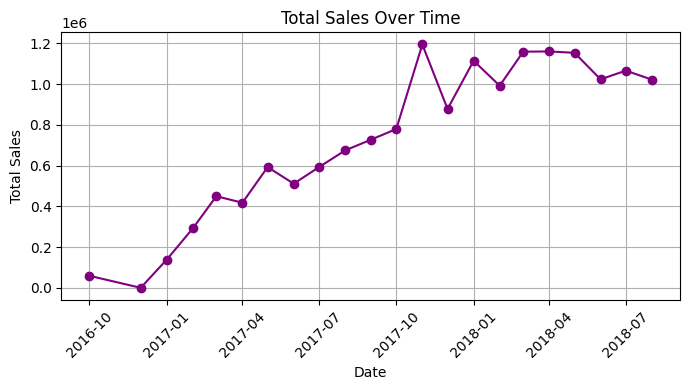

In [124]:
plt.figure(figsize=(7, 4)) 
plt.plot(Total_Sales_By_Month['Date'], Total_Sales_By_Month['Total_Sales'], color='purple', marker='o', linestyle='-') 
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


#### Conclusion

Based on the line plot, we can observe a growing trend in sales over time. The highest sales occurred in November 2017, which coincides with the Black Friday period. This suggests that the spike in sales during this month may be attributed to Black Friday promotions and increased consumer spending.


#### Average Customer Order Statictics

In [125]:
Average_Customer_Order_Stats


,Average_Total_Orders,Average_Payment,Average_Total_Payment
0,1.050653,158.3179,161.7198


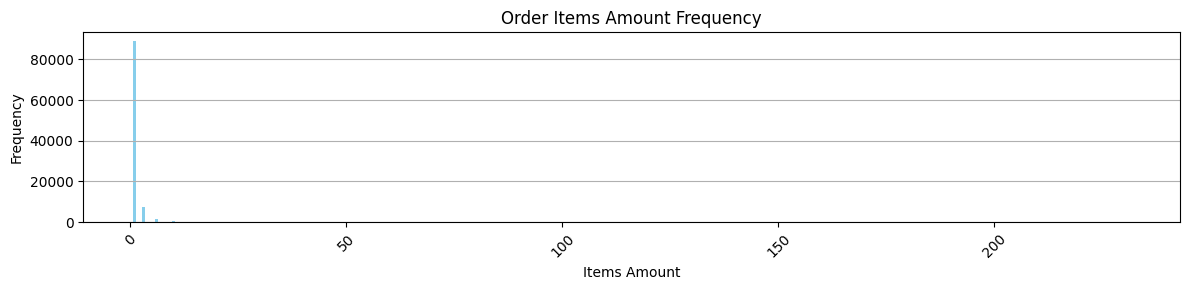

In [126]:
plt.figure(figsize=(12, 3))
plt.bar(Order_Items_Amount_Frequency['Items_Amount'], Order_Items_Amount_Frequency['Frequency'], color='skyblue')
plt.title('Order Items Amount Frequency')
plt.xlabel('Items Amount')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [127]:
Order_Items_Amount_Frequency

,Items_Amount,Frequency
0,1,88863
1,3,7516
2,6,1322
3,10,505
4,15,204
5,21,198
6,28,22
7,36,8
8,55,8
9,78,5


#### Most customers order only once and order only one item.

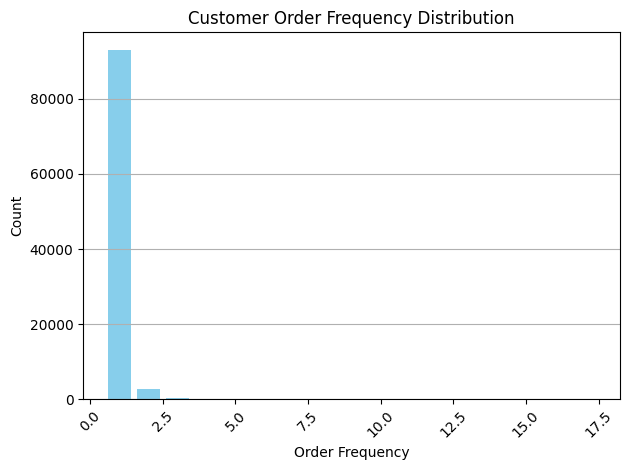

In [155]:
plt.bar(Frequency_Count['Frequency'], Frequency_Count['Count'], color='skyblue')
plt.title('Customer Order Frequency Distribution')
plt.xlabel('Order Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [158]:
Frequency_Count[Frequency_Count['Frequency']>1].sum()/Frequency_Count.sum()

Frequency    0.981481
Count        0.031188
dtype: float64

#### Around 3.11% of customers order more than once.

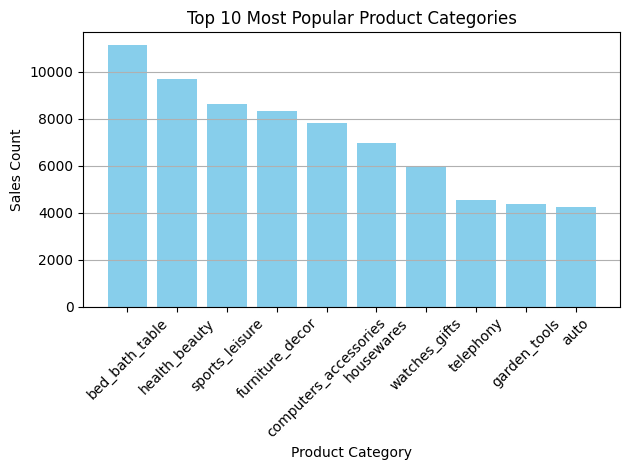

In [128]:
# plt.figure(figsize=(10, 6))
plt.bar(Top_10_Most_Popular_Product_Categories['product_category_name_english'], Top_10_Most_Popular_Product_Categories['Sales_Count'], color='skyblue')
plt.title('Top 10 Most Popular Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

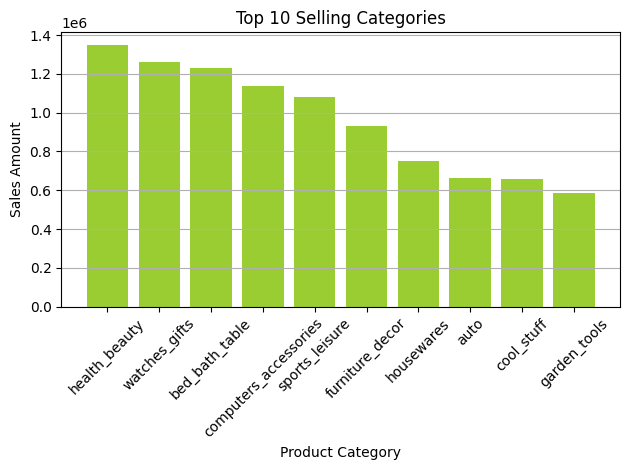

In [129]:
plt.bar(Top_10_Selling_Categories['product_category_name_english'], Top_10_Selling_Categories['Total_Sales_Amount'], color='yellowgreen')
plt.title('Top 10 Selling Categories')
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

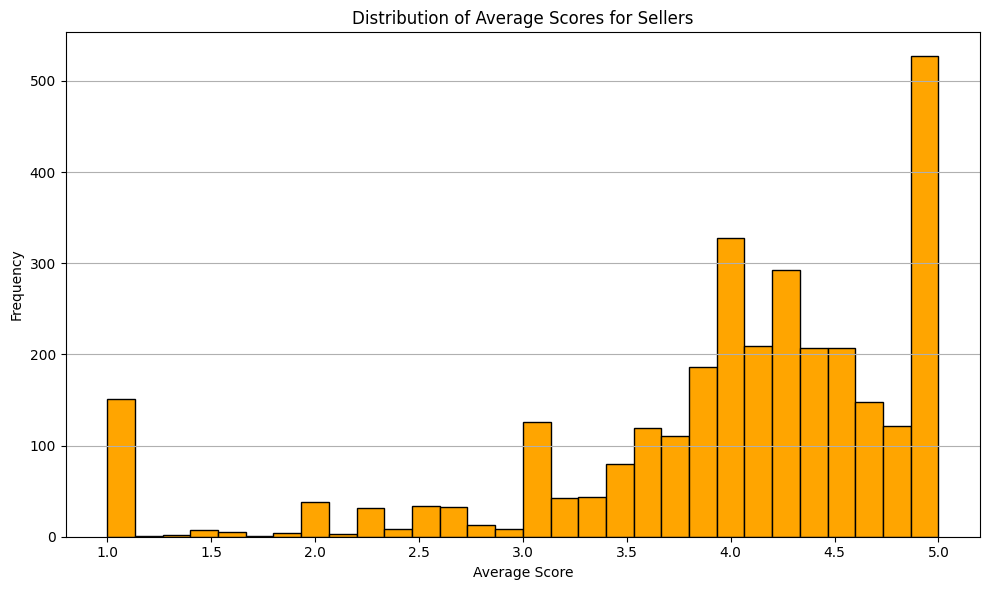

In [130]:
plt.figure(figsize=(10, 6))
plt.hist(Sellers_Ranking['Average_Score'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Average Scores for Sellers')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### We can conclude that most of the sellers have a high average score for their products (>4.0) 

#### Most Popular Products

In [131]:
Top_10_Selling_Products

,product_id,product_category_name,Total_Sales_Amount,Sales_Count
0,0xACA2EB7D00EA1A7B8EBD4E68314663AF,moveis_decoracao,45711.20,527
1,0x99A4788CB24856965C36A24E339B6058,cama_mesa_banho,47769.26,488
2,0x422879E10F46682990DE24D770E7F83D,ferramentas_jardim,43997.86,484
3,0x389D119B48CF3043D311335E499D9C6B,ferramentas_jardim,29268.59,392
4,0x368C6C730842D78016AD823897A372DB,ferramentas_jardim,29851.20,388
5,0x53759A2ECDDAD2BB87A079A1F1519F73,ferramentas_jardim,29764.20,373
6,0xD1C427060A0F73F6B889A5C7C61F2AC4,informatica_acessorios,50940.39,343
7,0x53B36DF67EBB7C41585E8D54D6772E08,relogios_presentes,42172.42,323
8,0x154E7E31EBFA092203795C972E5804A6,beleza_saude,6765.00,281
9,0x3DD2A17168EC895C781A9191C1E95AD7,informatica_acessorios,45879.40,274


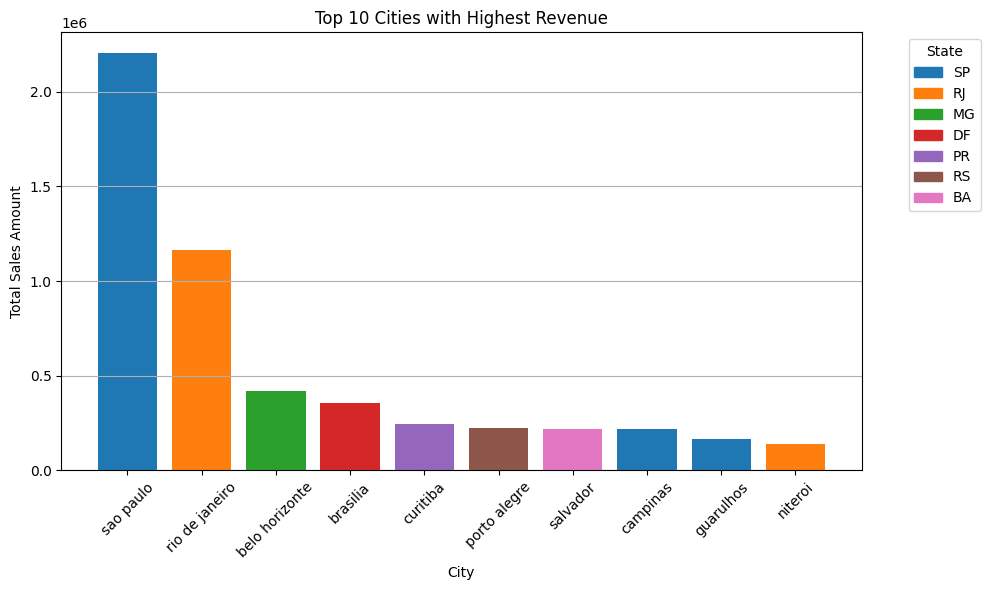

In [132]:
state_colors = {state: plt.cm.tab10(i) for i, state in enumerate(Top_10_cities_with_highest_revenue['customer_state'].unique())}
plt.figure(figsize=(10, 6))
for idx, city_row in Top_10_cities_with_highest_revenue.iterrows():
    state_color = state_colors[city_row['customer_state']]
    plt.bar(city_row['customer_city'], city_row['Total_Sales_Amount'], color=state_color, label=city_row['customer_state'])

# Add legend with unique state colors
handles = [plt.Rectangle((0,0),1,1, color=state_colors[state]) for state in Top_10_cities_with_highest_revenue['customer_state'].unique()]
plt.legend(handles, Top_10_cities_with_highest_revenue['customer_state'].unique(), title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Top 10 Cities with Highest Revenue')
plt.xlabel('City')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### From the bar plot, we can conclude that the state of São Paulo (SP) emerges as the top contributor.


In [133]:
Total_Sales_By_Month_By_State['Date'] = pd.to_datetime(Total_Sales_By_Month_By_State[['Year', 'Month']].assign(DAY=1))
Total_Sales_By_Month_By_State = Total_Sales_By_Month_By_State.drop(columns=['Month'])
Total_Sales_By_Month_By_State = Total_Sales_By_Month_By_State.drop(columns=['Year'])



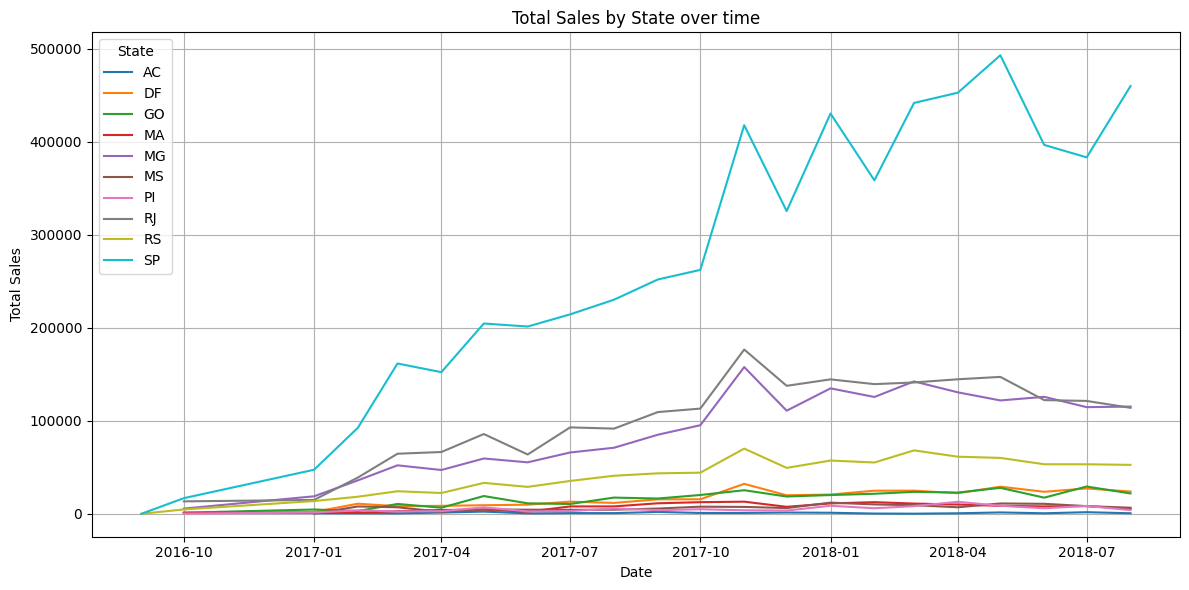

In [134]:
grouped = Total_Sales_By_Month_By_State.groupby('customer_state')
plt.figure(figsize=(12, 6))
for state, group in grouped:
    plt.plot(group['Date'], group['Total_Sales'], label=state)
plt.title('Total Sales by State over time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='State')
plt.grid(True)
plt.tight_layout()
plt.show()

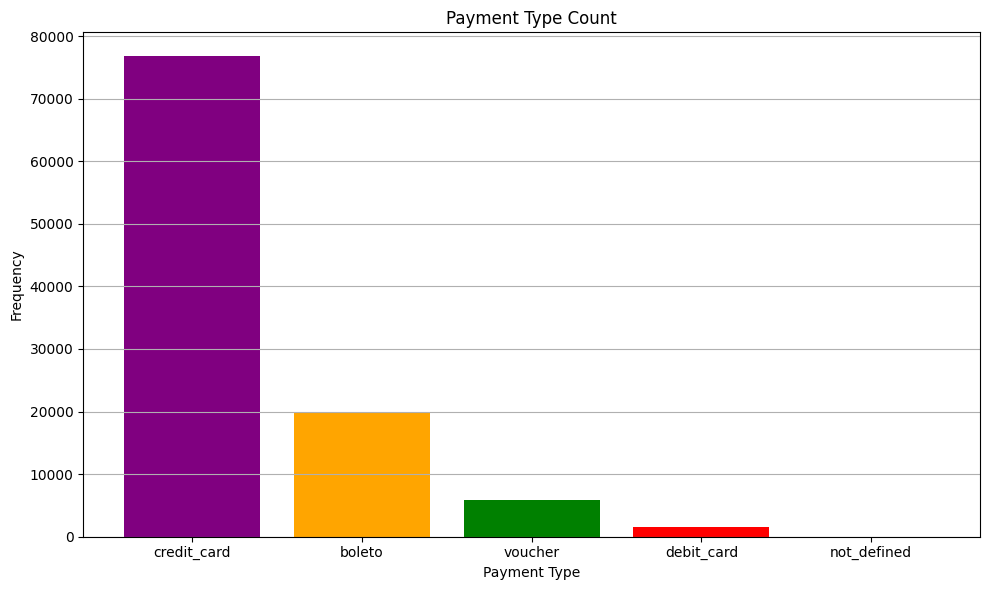

In [135]:
colors = ['purple', 'orange', 'green', 'red', 'skyblue']
plt.figure(figsize=(10, 6))
plt.bar(Payment_Type_Count['payment_type'], Payment_Type_Count['Frequency'], color=colors)
plt.title('Payment Type Count')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### The most preffered payment type is credit card

In [136]:
Payment_Types_Over_Time['Date'] = pd.to_datetime(Payment_Types_Over_Time[['Year', 'Month']].assign(DAY=1))
Payment_Types_Over_Time = Payment_Types_Over_Time.drop(columns=['Month'])
Payment_Types_Over_Time = Payment_Types_Over_Time.drop(columns=['Year'])

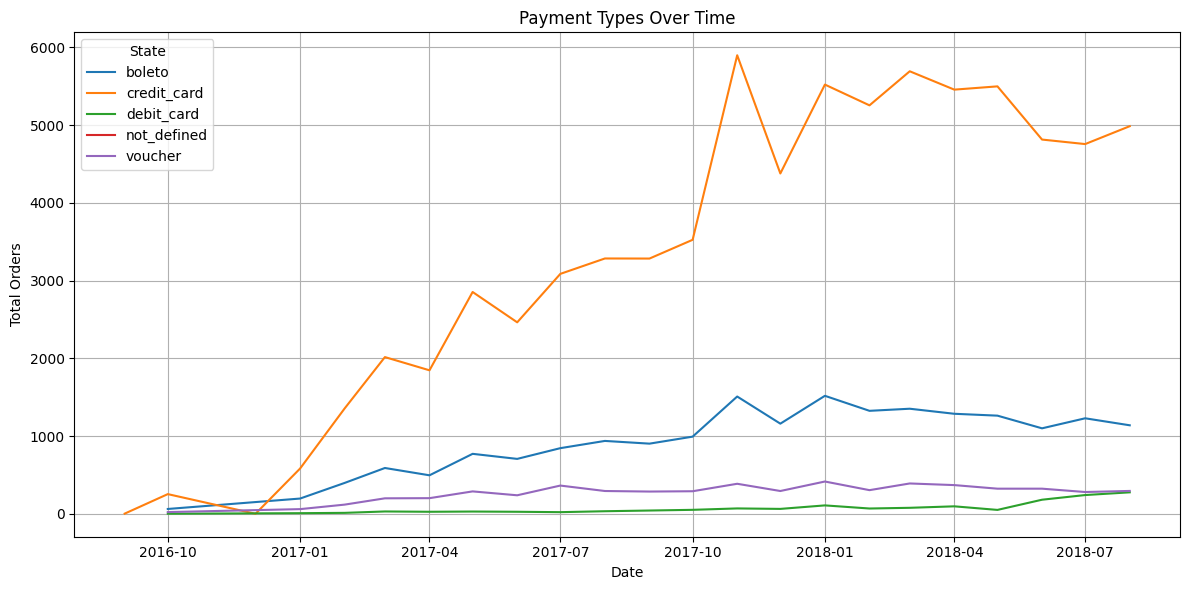

In [137]:

grouped = Payment_Types_Over_Time.groupby('payment_type')
plt.figure(figsize=(12, 6))
for state, group in grouped:
    plt.plot(group['Date'], group['Total_Orders'], label=state)
plt.title('Payment Types Over Time')
plt.xlabel('Date')
plt.ylabel('Total Orders')
plt.legend(title='State')
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusion
##### Based on the line plot depicting the variation of payment types over time, we observe a notable trend in credit card usage in Brazil. The frequency of credit card transactions appears to be consistently higher compared to other payment types across different months, suggesting a prevalent preference for credit card payments among consumers in Brazil.


### Delivery Time Analysis

In [140]:
Delivery_Days_Statictics.describe()

,Actual_Delivery_Days,Estimated_Delivery_Days
count,96423.000000,96423.000000
mean,11.990210,23.866712
std,9.523153,8.769738
min,0.000000,1.000000
25%,6.000000,18.000000
50%,10.000000,23.000000
75%,15.000000,29.000000
max,208.000000,154.000000


#### The mean value for actual delivery days is 11.99 days, while for estimated delivery days, it is 23.87 days. This suggests that, on average, deliveries are completed much earlier than initially estimated.

In [146]:
Delivery_Days_Statictics[Delivery_Days_Statictics['Actual_Delivery_Days']>Delivery_Days_Statictics["Estimated_Delivery_Days"]].count()/Delivery_Days_Statictics.count()

order_id                   0.067754
Actual_Delivery_Days       0.067754
Estimated_Delivery_Days    0.067754
dtype: float64

#### Around 7% of the orders were delivered later than expected, indicating a minor but noticeable portion of orders experiencing delays.

In [147]:
Delivery_Days_Statictics[Delivery_Days_Statictics['Actual_Delivery_Days']<Delivery_Days_Statictics["Estimated_Delivery_Days"]].count()/Delivery_Days_Statictics.count()


order_id                   0.918858
Actual_Delivery_Days       0.918858
Estimated_Delivery_Days    0.918858
dtype: float64

#### Around 92% of the orders were delivered earlier than expected.